In [93]:
#StockMarket Clustering with k-means using python
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas_datareader as web
plt.style.use('fivethirtyeight')

In [94]:
df=pd.read_csv('E:\\New folder\\data set\\nasdaq-listed-symbols_csv.csv')['Symbol']
df=df[:100]
df

0     AAIT
1      AAL
2     AAME
3     AAOI
4     AAON
      ... 
95    AHPI
96    AIMC
97    AINV
98     AIQ
99    AIRM
Name: Symbol, Length: 100, dtype: object

In [95]:
data = web.DataReader(df.values,data_source='yahoo',start='2017-01-01',end='2022-01-25')['Adj Close']
data

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'ABAC', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'ABCW', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'ABDC', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'ABGB', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas_datareader\base.py:272: SymbolWar

Symbols,AAIT,AAL,AAME,AAOI,AAON,AAPL,AAVL,AAWW,AAXJ,ABAX,...,AEGR,AEPI,AETI,AFFX,AFH,AFOP,AGII,AGIIL,AGNCB,AIRM
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.167127,44.741234,4.001374,23.100000,32.212547,27.332470,NaN,51.549999,50.558205,52.762024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.167127,45.127762,4.001374,23.510000,32.936974,27.301880,NaN,52.150002,51.059502,52.594776,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,0.168002,44.345024,3.757387,22.809999,31.971081,27.440722,NaN,51.150002,51.779552,51.807716,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,NaN,44.654255,4.001374,22.420000,31.584721,27.746634,NaN,50.750000,51.524342,52.732506,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,0.165377,45.494972,3.854982,22.240000,31.681314,28.000778,NaN,51.000000,51.569916,54.129528,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,0.091000,17.309999,2.500000,4.100000,67.260002,166.229996,NaN,78.669998,83.180000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-20,0.090000,16.760000,2.480000,3.980000,65.709999,164.509995,NaN,77.419998,84.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-21,NaN,16.299999,2.280000,3.860000,65.660004,162.410004,NaN,78.309998,82.599998,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
data=data.dropna(axis=1)
data

Symbols,AAL,AAME,AAOI,AAON,AAPL,AAWW,AAXJ,ABCB,ABIO,ABMD,...,AGEN,AGIO,AGNC,AGRX,AGTC,AGYS,AGZD,AHPI,AIMC,AINV
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,44.741234,4.001374,23.100000,32.212547,27.332470,51.549999,50.558205,40.886509,48.779999,112.360001,...,4.16,43.220001,10.903754,5.000,9.55,10.800000,42.802372,2.06,34.988777,9.911923
2017-01-04,45.127762,4.001374,23.510000,32.936974,27.301880,52.150002,51.059502,41.775345,48.599998,115.739998,...,4.33,45.689999,11.097522,2.630,9.70,10.700000,42.900047,2.06,35.035236,10.162226
2017-01-05,44.345024,3.757387,22.809999,31.971081,27.440722,51.150002,51.779552,41.354324,50.400002,114.809998,...,4.30,46.020000,11.121008,2.520,9.65,10.630000,42.891190,2.08,34.524113,10.212285
2017-01-06,44.654255,4.001374,22.420000,31.584721,27.746634,50.750000,51.524342,41.260757,50.400002,115.419998,...,4.32,47.500000,11.079907,2.690,9.45,10.650000,42.855656,2.14,34.105923,10.178910
2017-01-09,45.494972,3.854982,22.240000,31.681314,28.000778,51.000000,51.569916,40.138016,51.299999,117.110001,...,4.15,42.779999,11.079907,2.790,9.75,10.650000,42.749069,2.21,33.408939,10.145539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,17.309999,2.500000,4.100000,67.260002,166.229996,78.669998,83.180000,52.590000,1.980000,302.019989,...,2.81,31.030001,15.060000,0.342,1.67,37.490002,46.511990,4.29,47.840000,13.330000
2022-01-20,16.760000,2.480000,3.980000,65.709999,164.509995,77.419998,84.000000,50.599998,2.000000,302.750000,...,2.74,30.360001,14.950000,0.335,1.65,36.830002,46.492012,4.09,47.750000,13.210000
2022-01-21,16.299999,2.280000,3.860000,65.660004,162.410004,78.309998,82.599998,50.290001,1.920000,304.570007,...,2.68,29.799999,14.730000,0.300,1.57,36.000000,46.452061,3.66,47.139999,12.920000


In [97]:
data.isnull().sum()

Symbols
AAL     0
AAME    0
AAOI    0
AAON    0
AAPL    0
AAWW    0
AAXJ    0
ABCB    0
ABIO    0
ABMD    0
ACAD    0
ACFN    0
ACGL    0
ACHC    0
ACIW    0
ACLS    0
ACNB    0
ACOR    0
ACRX    0
ACST    0
ACTG    0
ACUR    0
ACWI    0
ACWX    0
ADBE    0
ADES    0
ADI     0
ADMA    0
ADMP    0
ADP     0
ADRE    0
ADSK    0
ADTN    0
ADUS    0
AEHR    0
AEIS    0
AERI    0
AEY     0
AEZS    0
AFMD    0
AGEN    0
AGIO    0
AGNC    0
AGRX    0
AGTC    0
AGYS    0
AGZD    0
AHPI    0
AIMC    0
AINV    0
dtype: int64

In [98]:
data.reset_index(drop=True, inplace=True)

In [99]:
data

Symbols,AAL,AAME,AAOI,AAON,AAPL,AAWW,AAXJ,ABCB,ABIO,ABMD,...,AGEN,AGIO,AGNC,AGRX,AGTC,AGYS,AGZD,AHPI,AIMC,AINV
0,44.741234,4.001374,23.100000,32.212547,27.332470,51.549999,50.558205,40.886509,48.779999,112.360001,...,4.16,43.220001,10.903754,5.000,9.55,10.800000,42.802372,2.06,34.988777,9.911923
1,45.127762,4.001374,23.510000,32.936974,27.301880,52.150002,51.059502,41.775345,48.599998,115.739998,...,4.33,45.689999,11.097522,2.630,9.70,10.700000,42.900047,2.06,35.035236,10.162226
2,44.345024,3.757387,22.809999,31.971081,27.440722,51.150002,51.779552,41.354324,50.400002,114.809998,...,4.30,46.020000,11.121008,2.520,9.65,10.630000,42.891190,2.08,34.524113,10.212285
3,44.654255,4.001374,22.420000,31.584721,27.746634,50.750000,51.524342,41.260757,50.400002,115.419998,...,4.32,47.500000,11.079907,2.690,9.45,10.650000,42.855656,2.14,34.105923,10.178910
4,45.494972,3.854982,22.240000,31.681314,28.000778,51.000000,51.569916,40.138016,51.299999,117.110001,...,4.15,42.779999,11.079907,2.790,9.75,10.650000,42.749069,2.21,33.408939,10.145539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,17.309999,2.500000,4.100000,67.260002,166.229996,78.669998,83.180000,52.590000,1.980000,302.019989,...,2.81,31.030001,15.060000,0.342,1.67,37.490002,46.511990,4.29,47.840000,13.330000
1271,16.760000,2.480000,3.980000,65.709999,164.509995,77.419998,84.000000,50.599998,2.000000,302.750000,...,2.74,30.360001,14.950000,0.335,1.65,36.830002,46.492012,4.09,47.750000,13.210000
1272,16.299999,2.280000,3.860000,65.660004,162.410004,78.309998,82.599998,50.290001,1.920000,304.570007,...,2.68,29.799999,14.730000,0.300,1.57,36.000000,46.452061,3.66,47.139999,12.920000
1273,16.410000,2.310000,4.020000,67.489998,161.619995,79.279999,81.589996,51.529999,1.900000,311.940002,...,2.69,31.170000,14.730000,0.321,1.60,37.209999,46.502003,3.52,48.570000,12.780000


In [100]:
#Calculat the annual mean returns and variance
daily_returns=data.pct_change()
annual_mean_return = daily_returns.mean()*252
annual_return_variance = daily_returns.var()*252

In [101]:
#create a new dataframe
df2 = pd.DataFrame(data.columns.values,columns=['Stock_symbols'])
df2['Variances']=annual_return_variance.values
df2['Returns']=annual_mean_return.values
df2

,Stock_symbols,Variances,Returns
0,AAL,0.333988,-0.035558
1,AAME,0.841475,0.267895
2,AAOI,0.504605,-0.091403
3,AAON,0.117768,0.200198
4,AAPL,0.092356,0.395705
5,AAWW,0.228612,0.197022
6,AAXJ,0.041640,0.114919
7,ABCB,0.173407,0.132231
8,ABIO,4.078989,0.372948
9,ABMD,0.172897,0.281084


In [102]:
#Use the elbow method to determine the number of cluster
#get and store annual returns and annual variances
x=df2[['Returns','Variances']].values
x

array([[-3.55580988e-02,  3.33987627e-01],
       [ 2.67895421e-01,  8.41475133e-01],
       [-9.14028374e-02,  5.04604631e-01],
       [ 2.00198083e-01,  1.17767504e-01],
       [ 3.95705109e-01,  9.23559318e-02],
       [ 1.97022341e-01,  2.28612391e-01],
       [ 1.14918663e-01,  4.16404165e-02],
       [ 1.32231309e-01,  1.73407299e-01],
       [ 3.72947652e-01,  4.07898899e+00],
       [ 2.81083680e-01,  1.72897042e-01],
       [ 1.77948718e-01,  4.63701659e-01],
       [ 7.00987910e-01,  9.76999658e-01],
       [ 1.37513631e-01,  9.31907133e-02],
       [ 2.20886741e-01,  2.52765067e-01],
       [ 1.76174521e-01,  1.29367974e-01],
       [ 4.23196643e-01,  2.77024366e-01],
       [ 1.43503565e-01,  1.98620549e-01],
       [-3.98687312e-01,  8.28985832e-01],
       [ 8.04143709e-02,  8.08306165e-01],
       [ 3.66556038e-01,  1.69753614e+00],
       [ 2.22759918e-02,  2.29501860e-01],
       [ 1.55344133e+00,  3.72108406e+00],
       [ 1.34903112e-01,  3.21485764e-02],
       [ 9.

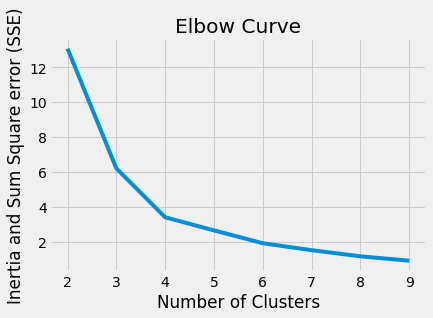

In [103]:
inertial_list =[]
for k in range(2,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    inertial_list.append(kmeans.inertia_)
#plot the data
plt.plot(range(2,10),inertial_list)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia and Sum Square error (SSE)')
plt.show()

In [104]:
kmeans=KMeans(n_clusters=4).fit(x)
labels=kmeans.labels_
labels

array([0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 1, 0, 2,
       0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       3, 0, 0, 2, 0, 0])

In [105]:
df2['Cluster_Labels']= labels
df2

,Stock_symbols,Variances,Returns,Cluster_Labels
0,AAL,0.333988,-0.035558,0
1,AAME,0.841475,0.267895,3
2,AAOI,0.504605,-0.091403,0
3,AAON,0.117768,0.200198,0
4,AAPL,0.092356,0.395705,0
5,AAWW,0.228612,0.197022,0
6,AAXJ,0.041640,0.114919,0
7,ABCB,0.173407,0.132231,0
8,ABIO,4.078989,0.372948,2
9,ABMD,0.172897,0.281084,0


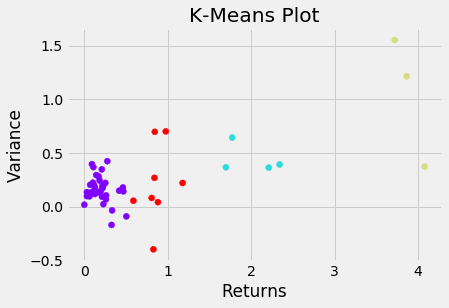

In [106]:
plt.scatter(df2['Variances'],df2['Returns'], c= labels,cmap='rainbow')
plt.title('K-Means Plot')
plt.xlabel('Returns')
plt.ylabel('Variance')
plt.show()

In [107]:
df2.sort_values(by=['Cluster_Labels'], ascending=False).head(20)

,Stock_symbols,Variances,Returns,Cluster_Labels
28,ADMP,1.178754,0.219928,3
27,ADMA,0.589153,0.054180,3
1,AAME,0.841475,0.267895,3
34,AEHR,0.845584,0.697171,3
44,AGTC,0.883198,0.041161,3
18,ACRX,0.808306,0.080414,3
11,ACFN,0.977000,0.700988,3
17,ACOR,0.828986,-0.398687,3
47,AHPI,3.863136,1.215641,2
21,ACUR,3.721084,1.553441,2
